In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import torch

In [82]:
station_40 = pd.read_csv('data/station_40.csv')
station_49 = pd.read_csv('data/station_49.csv')
station_63 = pd.read_csv('data/station_63.csv')
station_80 = pd.read_csv('data/station_80.csv')

n = len(station_40)

Q1 = 3.3241
Q2 = 5.1292
Q3 = 6.4897
Q4 = 7.1301

In [83]:
station_40.head()

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD
0,0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,5.739711,2.787364,1.843174,1.549155,0.394481,2.868049,1.587736,3.046101,2.680206,10.32
1,1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,1.891106,3.610893,2.148366,2.317832,0.822936,2.606934,1.883197,1.297795,7.477726,10.39
2,2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,4.745318,1.872529,4.237160,0.086909,1.460638,2.163314,7.340032,3.863088,2.659763,8.49
3,3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,8.479863,5.067890,3.836785,0.239243,0.113061,3.535262,4.748053,0.914197,0.926442,7.28
4,4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,3.405621,0.363119,1.941876,0.259491,0.814974,1.240040,0.611056,1.746779,1.708829,7.31


In [84]:
indexes_40 = station_40.index[station_40['W_13'] + station_40['W_14'] + station_40['W_15'] <= Q1].tolist()
indexes_49 = station_49.index[station_49['W_13'] + station_49['W_14'] + station_49['W_15'] <= Q2].tolist()
indexes_63 = station_63.index[station_63['W_13'] + station_63['W_14'] + station_63['W_15'] <= Q3].tolist()
indexes_80 = station_80.index[station_80['W_13'] + station_80['W_14'] + station_80['W_15'] <= Q4].tolist()

extremes_indexes = np.intersect1d(np.intersect1d(indexes_40, indexes_49), np.intersect1d(indexes_63, indexes_80))


In [85]:
# build yields from extremes indexes
extreme_yields = np.zeros(shape=(len(extremes_indexes), 4))
for i in range(len(extremes_indexes)):
    extreme_yields[i, 0] = station_40['YIELD'][extremes_indexes[i]]
    extreme_yields[i, 1] = station_49['YIELD'][extremes_indexes[i]]
    extreme_yields[i, 2] = station_63['YIELD'][extremes_indexes[i]]
    extreme_yields[i, 3] = station_80['YIELD'][extremes_indexes[i]]
    
# build yields from non extreme indexes
non_extreme_indexes = np.setdiff1d(np.arange(n), extremes_indexes)
non_extreme_yields = np.zeros(shape=(len(non_extreme_indexes), 4))
for i in range(len(non_extreme_indexes)):
    non_extreme_yields[i, 0] = station_40['YIELD'][non_extreme_indexes[i]]
    non_extreme_yields[i, 1] = station_49['YIELD'][non_extreme_indexes[i]]
    non_extreme_yields[i, 2] = station_63['YIELD'][non_extreme_indexes[i]]
    non_extreme_yields[i, 3] = station_80['YIELD'][non_extreme_indexes[i]]

In [89]:
torch.save(extreme_yields, 'data/extreme_yields.pt')

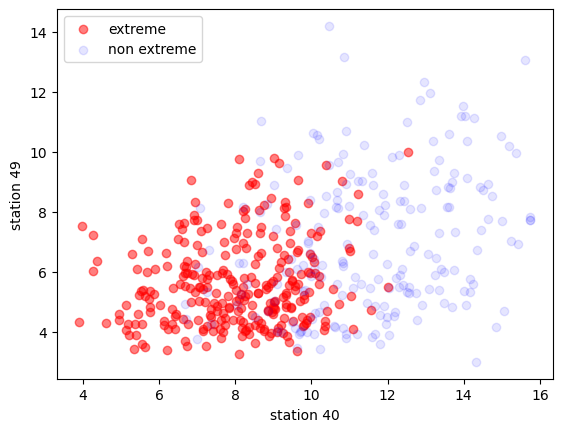

In [63]:
subset_indexes = np.arange(200, 400)
#subset_indexes = np.arange(n)

# plot the extreme yields and the non extreme yields in a 2D point cloud with opacity
plt.scatter(extreme_yields[:, 0], extreme_yields[:, 1], color='red', label='extreme', alpha=0.5)
plt.scatter(non_extreme_yields[subset_indexes, 0], non_extreme_yields[subset_indexes, 1], color='blue', label='non extreme', alpha=0.1)
plt.xlabel('station 40')
plt.ylabel('station 49')
plt.legend()
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 282 samples in 0.000s...
[t-SNE] Computed neighbors for 282 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 282 / 282
[t-SNE] Mean sigma: 1.338760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.261444
[t-SNE] KL divergence after 1000 iterations: 0.704034
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9718 samples in 0.008s...
[t-SNE] Computed neighbors for 9718 samples in 0.544s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9718
[t-SNE] Computed conditional probabilities for sample 2000 / 9718
[t-SNE] Computed conditional probabilities for sample 3000 / 9718
[t-SNE] Computed conditional probabilities for sample 4000 / 9718
[t-SNE] Computed conditional probabilities for sample 5000 / 9718
[t-SNE] Computed conditional probabilities for sample 6000 / 9718
[t-SNE] Computed conditional probabilities for sample 7000 / 9718
[t-SNE] Computed conditional prob

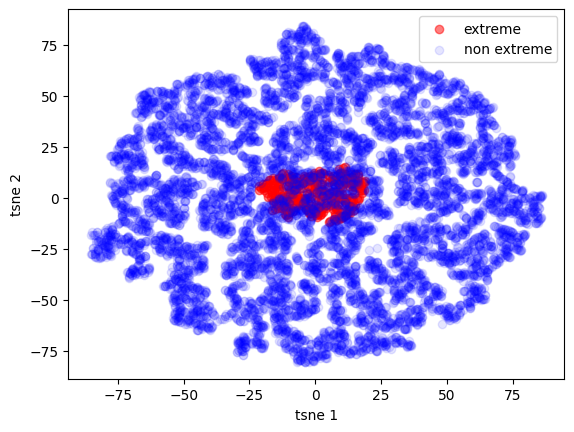

In [78]:
# Plot the tsne vizualization of the extreme yields and the non extreme yields

# create the tsne object
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, verbose=1, random_state=42)
extreme_tsne = tsne.fit_transform(extreme_yields)
non_extreme_tsne = tsne.fit_transform(non_extreme_yields)

# plot the tsne vizualization
plt.scatter(extreme_tsne[:, 0], extreme_tsne[:, 1], color='red', label='extreme', alpha=0.5)
plt.scatter(non_extreme_tsne[:, 0], non_extreme_tsne[:, 1], color='blue', label='non extreme', alpha=0.1)
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.legend()
plt.show()


# Statistics on yields

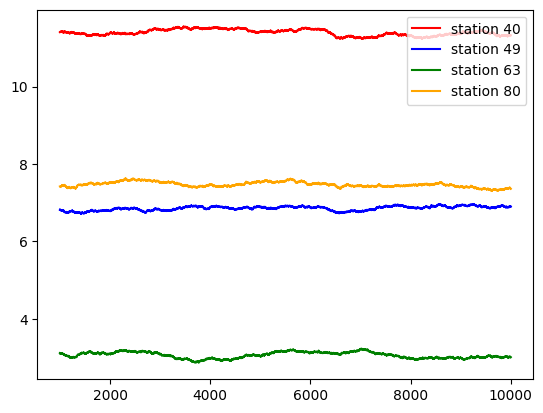

In [74]:
# Check the trend evolution of yields using moving average
window = 1000

plt.plot(station_40['YIELD'].rolling(window).mean(), color='red', label='station 40')
plt.plot(station_49['YIELD'].rolling(window).mean(), color='blue', label='station 49')
plt.plot(station_63['YIELD'].rolling(window).mean(), color='green', label='station 63')
plt.plot(station_80['YIELD'].rolling(window).mean(), color='orange', label='station 80')
plt.legend()
plt.show()

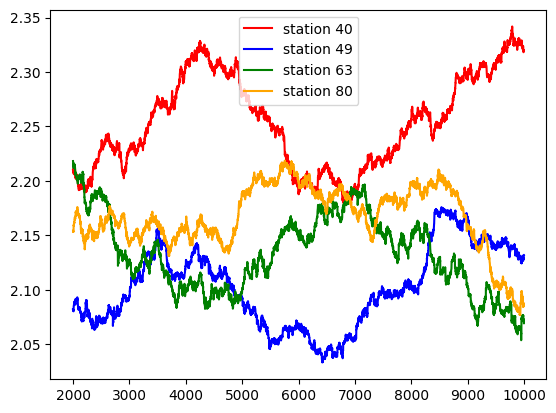

In [76]:
# Check the trend evolution of yields using moving average
window = 2000

plt.plot(station_40['YIELD'].rolling(window).std(), color='red', label='station 40')
plt.plot(station_49['YIELD'].rolling(window).std(), color='blue', label='station 49')
plt.plot(station_63['YIELD'].rolling(window).std(), color='green', label='station 63')
plt.plot(station_80['YIELD'].rolling(window).std(), color='orange', label='station 80')
plt.legend()
plt.show()